# Homework 3. Moments and maximum likelihood methods

## Setting


In [16]:
import numpy as np
from scipy import stats

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import rcParams
rcParams['figure.figsize'] = (20, 6)

## Task 2

Наведено данi про мiсячнi продажi альбому «Shangri-La» iндi-гурту «Blake
Maloka»: 5, 7, 3, 3, 5, 2, 4, 4, 1, 3, 1, 3, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0.

### A

Вiзуалiзуйте данi зручним для вас способом.

In [18]:
data = np.array([5, 7, 3, 3, 5, 2, 4, 4, 1, 3, 1, 3, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0])

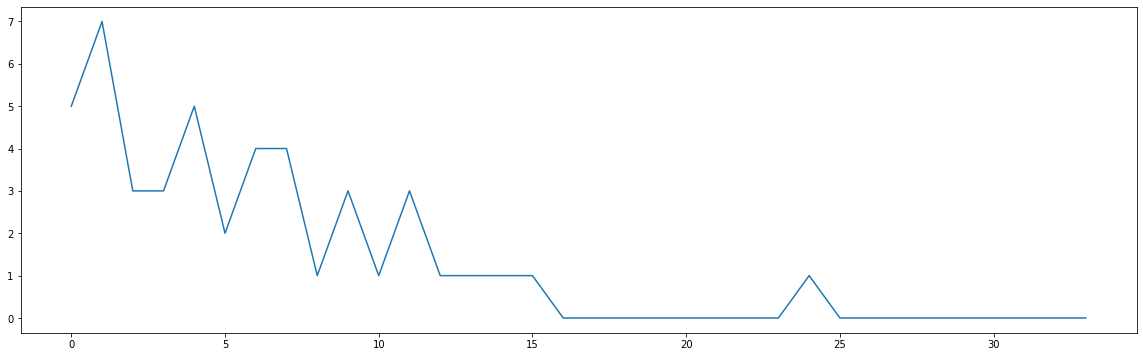

In [19]:
plt.plot(data)
plt.show()

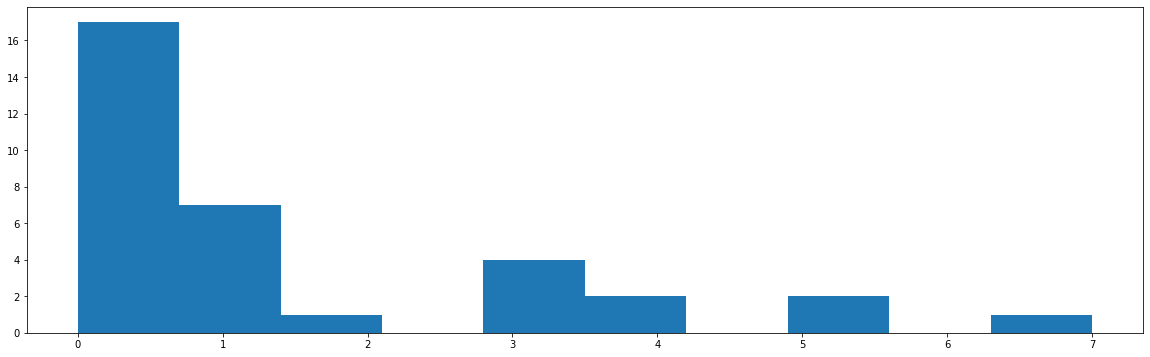

In [20]:
plt.hist(data)
plt.show()

### B

Вiдрахуйте вибiркове середнє та дисперсiю.

In [21]:
data.mean()

1.3529411764705883

In [22]:
data.std(ddof=1)

1.8729712732378818

In [23]:
data.var()

3.40484429065744

### C

Вважаючи розподiл даних пуассонiвським, оцiнiть його параметр за допомогою побудованої в задачi 1 оцiнки. Наскiльки придатною ви вважаєте пуассонiвську модель для наведених даних?

$$\hat{\lambda} = \bar{X}$$

In [24]:
l = data.mean()

Побудуємо EPDF нашої вибірки та PPF розподілу Пуасона з параметром $\lambda=\hat{\lambda}$

In [25]:
from scipy.special import gamma

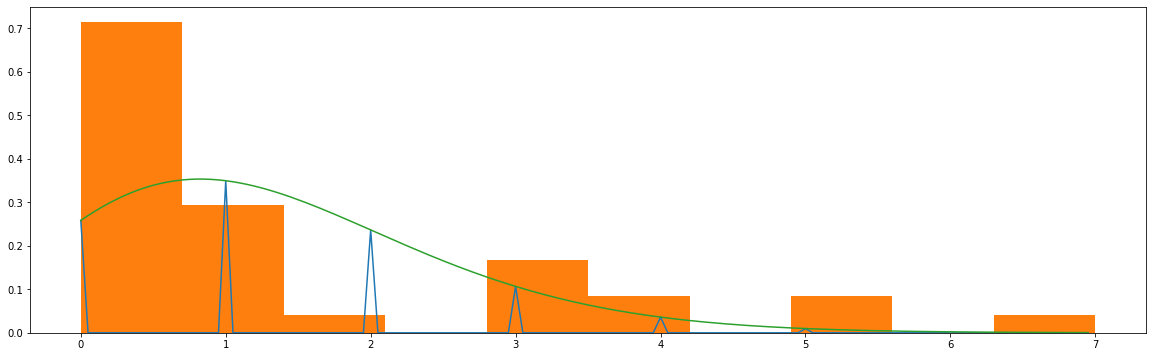

In [26]:
x = np.arange(0, data.max(), 0.05)
plt.plot(x, stats.poisson.pmf(x, mu=l))
plt.hist(data, density=True)
plt.plot(x, np.power(l, x) * np.exp(-l) / gamma(x+1))
plt.show()

In [27]:
stats.kstest(data, stats.poisson.cdf, args=[l])

KstestResult(statistic=0.2584789094739672, pvalue=0.017171215456723843)

Оскільки $p$-value більше $0.05$, гіпотезу про те, що вибірка розподілено відповідно до розподілу Пуасона можна приймати

Але при цьому варто брати до уваги, що в наведених даних надто важливим є їх порядок -- можна побачити, що спочатку продажі були значно більші, ніж далі. Тому вважати ці дані статистичною виборкою незалежних величин зовсім некоректно.

### D

Використовуючи результати пункту в), побудуйте прогноз продажiв диску на наступний мiсяць.

Якщо не брати до уваги порядок даних, прогнозом може слугувати матсподівання розподілу. Але знов ж таки, це такий собі прогноз

In [28]:
l

1.3529411764705883

### E

Використовуючи результати пункту 1г), оцiнiть iмовiрнiсть того, що наступного мiсяцi буде продано жодного диску та порiвняйте цю оцiнку з емпiричною вiдносною частотою.

$P(X_1=0, \dots X_{30}=0) = P(X = 0)^{30} = e^{-30\lambda}$

In [29]:
np.exp(-30*l)

2.359138192733363e-18

### F

Припущення про незалежність даних продаж максимально нереалістичне 